# Transformação de dados

Código em Python para análise de dados. 


Este notebook foi desenvolvido para o ambiente JUPYTER.

Prof. Hugo de Paula



# Inicialização da plataforma

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

## Bibliotecas



```numpy``` -- usada para processamento numérico.

```pandas``` -- usada para manipulação de bases de dados.

```pyplot``` -- usada para visualização de dados.

```seaborn``` -- usada para visualização de dados.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas sklearn 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Base de dados do Titanic

Essa base de dados pode ser obtida no Kaggle, no endereço: 
[www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

### DESCRIÇÃO DOS ATRIBUTOS:


*   ```survival``` --  Sobrevivente (0 = Não; 1 = Sim)
*   ```pclass``` --  Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)
*   ```name``` --  Nome (str)
*   ```sex``` --  Sexo (male; female)
*   ```age``` --  Idade (numérica)
*   ```sibsp``` --  Número de irmãos/conjuges à bordo
*   ```parch``` --  Número de pais/filhos à bordo
*   ```ticket``` --  Número da passagem
*   ```fare``` --  Tarifa do passageiro
*   ```cabin``` --  Cabine
*   ```embarked``` --  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

### UPLOAD DE ARQUIVO LOCAL:






In [15]:
titanic_train = pd.read_csv(r'C:\Users\user\OneDrive\Área de Trabalho\pcd-si-template\help\Jupyter examples\Datasets\Titanic\train.csv')


* Usando o comando ```.shape``` para descobrir o numero de **linhas** e **colunas** de nossa base. 

In [16]:
print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))


Dimensões de Titanic:
(891, 12)



* Usando o comando ```.keys``` para descobrir as **colunas** de nossa base. 

In [17]:
print("\nCampos de Titanic:\n{0}\n".format(list(titanic_train.keys())))


Campos de Titanic:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']



* Usando o comando ```.info``` para visualizar os tipos de dados de nossa base. 

In [18]:
print("\nTipos dos dados:\n")
titanic_train.info()


Tipos dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### ESTATÍSTICA DESCRITIVA DOS DADOS

O comando describe exibe prioritariamente os campos numéricos. Deve-se isolar os campos categóricos para serem exibidos posteriormente.

In [19]:
# Exibe apenas os campos numéricos:

print(titanic_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [20]:
# Para se ter uma visão dos atributos categóricos, os atributos não numéricos 
# são descartados. 

categ = titanic_train.dtypes[titanic_train.dtypes == "object"].index

print("\n", titanic_train[categ].describe(), sep='\n')




                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644




```
# Isto está formatado como código
```

### REMOÇÃO DE ATRIBUTOS IRRELEVANTES

Os atributos ```survival``` (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: ```Pclass```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Fare``` e ```Embarked```. 


* ```passengerId``` é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* ```Name``` náo é útil para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).

* ```Ticket``` não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.

* ```Cabin``` não identifica bem os passageiros, mas pode ser útil utilizarmos o padrão letra+numero para descrever os passageiros pelo andar do local da cabine.

In [21]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]

# Verifique que o número de atributos reduziu para 10.

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))


Dimensões de Titanic:
(891, 10)



### TRANSFORMAÇÃO DE VARIÁVEIS

#### Converter numérico em categórico.

Variáveis categóricas codificadas numericamente possuem baixa legibilidade. Portanto, podem ser candidatas a serem recodificadas.

In [22]:
# OBSERVAÇÃO: se a base for usada para a competição do kaggle, o atributo
# alvo, que é o campo 'survived' não deve ser recodificada.

new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Morreu","Sobreviveu"])              
titanic_train["Survived"] = new_survived

new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1aClasse","2aClasse","3aClasse"])     
titanic_train["Pclass"] = new_Pclass

titanic_train["Embarked"] = pd.Categorical(titanic_train["Embarked"])
titanic_train["Sex"] = pd.Categorical(titanic_train["Sex"])


print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))

categ = titanic_train.dtypes[titanic_train.dtypes == "category"].index
print("\n", titanic_train[categ].describe(), sep='\n')



Tipos dos dados:
Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked    category
dtype: object



       Survived    Pclass   Sex Embarked
count       891       891   891      889
unique        2         3     2        3
top      Morreu  3aClasse  male        S
freq        549       491   577      644


#### Converter atributo através de processamento de string (usando *list comprehension*).

No atributo ```Cabin```,  parece que o padrão letra+número (veja exibição a seguir) indica que uma cabine pertence a algum andar, ou nível. Podemos agrupar o atributo Cabin pela letra inicial da cabine.


In [23]:
#Exibe valores únicos

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')

# Converte o dado para String

char_cabin = titanic_train["Cabin"].astype(str)

# Pega apenas a primeira letra

new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train["Cabin"] = new_cabin

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Valores

### VALORES OMISSOS OU INCONSISTENTES

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo ```Age``` para tratarmos os valores omissos.

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

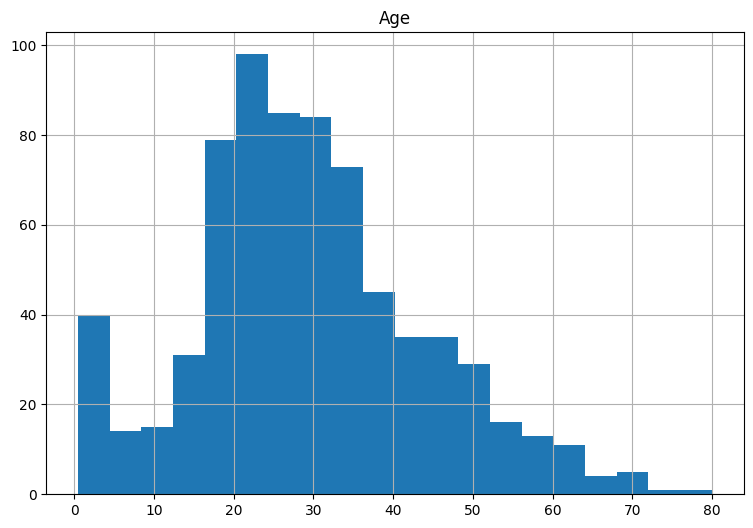

In [24]:
titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20)         # Numero de colunas do histogram

O dado possui uma distribuição próxima da distribuição Normal. Vamos usar a mediana para preencher os valores faltantes.


Análise do novo atributo Age:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

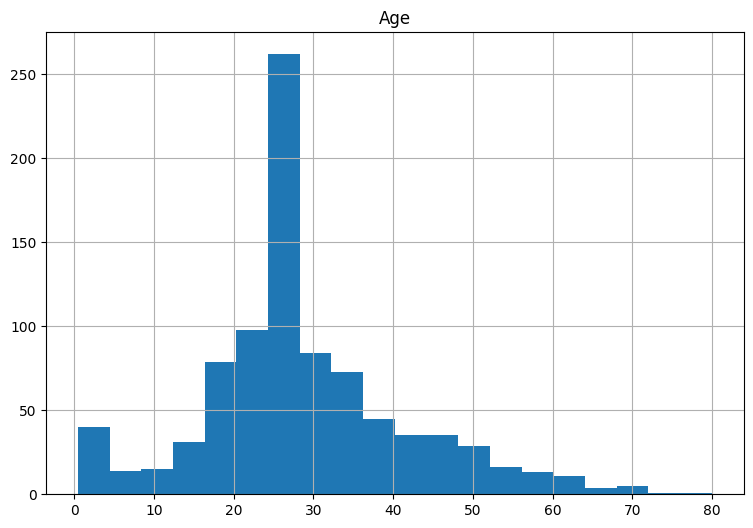

In [25]:
mediana = np.median([el for el in titanic_train["Age"] if (np.isnan(el) == False)])

new_age = np.where(titanic_train["Age"].isnull(), # condição
                   mediana,                       # valor se verdadeiro
                   titanic_train["Age"])          # valor se falso
titanic_train["Age"] = new_age

print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())

titanic_train.hist(column='Age',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20)         # Numero de colunas do histogram


### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

Registros com valores extremos:
       Survived    Pclass                                Name     Sex   Age  \
258  Sobreviveu  1aClasse                    Ward, Miss. Anna  female  35.0   
679  Sobreviveu  1aClasse  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737  Sobreviveu  1aClasse              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch      Fare Cabin Embarked  
258      0      0  512.3292     n        C  
679      0      1  512.3292     B        C  
737      0      0  512.3292     B        C  


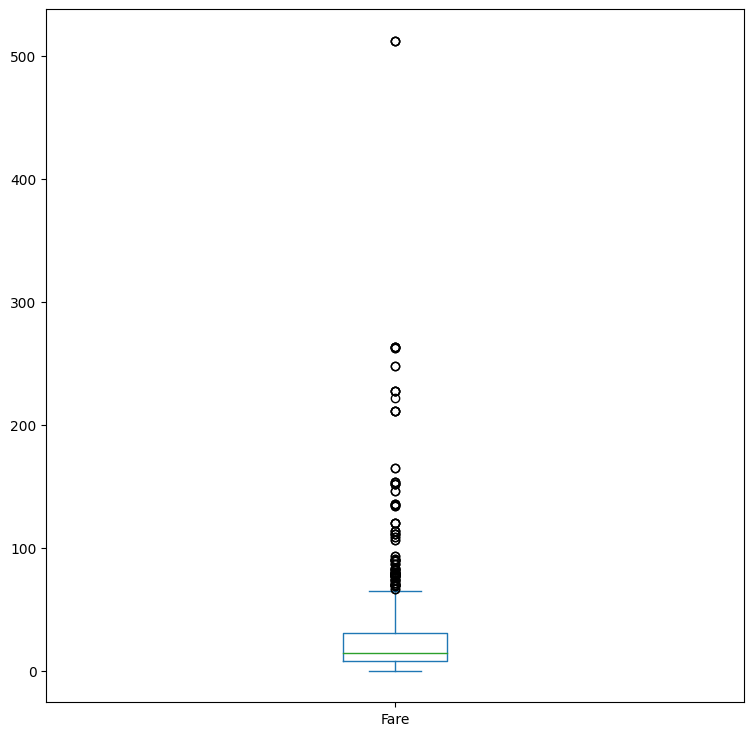

In [26]:
titanic_train["Fare"].plot(kind="box", figsize=(9,9))

index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )

print("Registros com valores extremos:",titanic_train.loc[index], sep='\n')


CRIANDO NOVOS ATRIBUTOS

Vamos criar uma nova variável ```Family```, que irá unir, conjude e irmãos (```SibSp```) com pais e filhos (```Parch```).

In [27]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

# Encontrando quem tem a maior família À bordo

most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

print("\nAs maiores famílias à bordo:\n{0}".format(titanic_train.loc[most_family]))



As maiores famílias à bordo:
    Survived    Pclass                               Name     Sex   Age  \
159   Morreu  3aClasse         Sage, Master. Thomas Henry    male  28.0   
180   Morreu  3aClasse       Sage, Miss. Constance Gladys  female  28.0   
201   Morreu  3aClasse                Sage, Mr. Frederick    male  28.0   
324   Morreu  3aClasse           Sage, Mr. George John Jr    male  28.0   
792   Morreu  3aClasse            Sage, Miss. Stella Anna  female  28.0   
846   Morreu  3aClasse           Sage, Mr. Douglas Bullen    male  28.0   
863   Morreu  3aClasse  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked  Family  
159      8      2  69.55     n        S      10  
180      8      2  69.55     n        S      10  
201      8      2  69.55     n        S      10  
324      8      2  69.55     n        S      10  
792      8      2  69.55     n        S      10  
846      8      2  69.55     n        S      10  
863      8      2  

 Os atributos agora estão redundantes, ou muito correlacionados, como podemos ver com a matriz de correlação. A matriz só funciona com tipos de ddos numéricos. Será possível perceber que a variável ```Family``` terá forte correlação (acima de 0.75) com ```SibSp``` e ```Parch```.

In [28]:
int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))



Matriz de correlação dos atributos inteiros:
           SibSp     Parch    Family
SibSp   1.000000  0.414838  0.890712
Parch   0.414838  1.000000  0.783111
Family  0.890712  0.783111  1.000000


# Base de dados do Gazola de imóveis em São Paulo

A base possui 14 campos: um identificador, 11 atributos e 2 rótulos (Cub e Preço $).

### UPLOAD DE ARQUIVO LOCAL:

Deve-se importar o arquivo "Gazola_dados_apartamento_resumo.xls" disponível na pasta "Datasets".



In [35]:
gazola = pd.read_excel(r"C:\Users\user\OneDrive\Área de Trabalho\pcd-si-template\help\Jupyter examples\Datasets\Gazola_dados_apartamento_resumo.xls")

In [ ]:


print("\nDimensões:\n{0}\n".format(gazola.shape))
print("\nCampos:\n{0}\n".format(list(gazola.keys())))
print("\nTipos dos dados:\n{0}\n".format(gazola.dtypes))
print(gazola.describe(percentiles=[]))




Dimensões:
(397, 14)


Campos:
['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte', 'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)']


Tipos dos dados:
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object

       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.

### PREPARANDO A BASE PARA O TREINAMENTO

É necessário remover o identificador, retirar o Cub e definir o preço como atributo alvo.

```train_test_split``` irá separar a base em "base de treinamento" e "base de teste" a partir de uma amostragem aleatória.


Base de treinamento:(357, 11)
Base de teste:(40, 11)


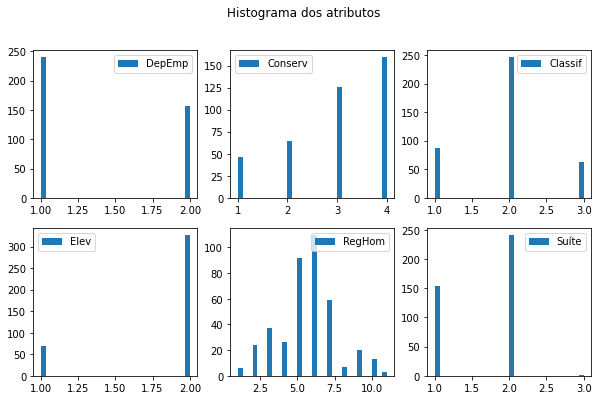

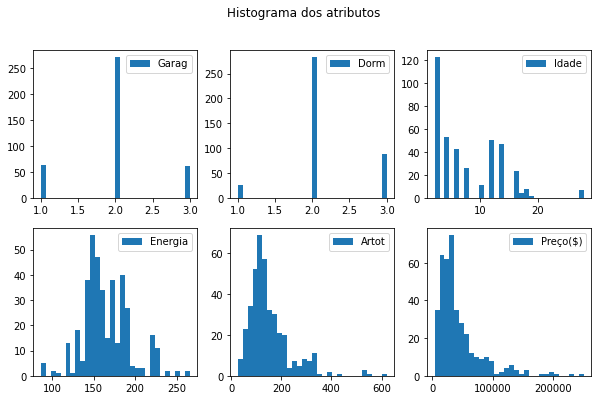

In [ ]:
X = gazola.iloc[:,1:(gazola.shape[1] - 2)]

y = gazola.iloc[:,(gazola.shape[1] - 1)]

# Recupera os nomes dos atributos

atributos = list(gazola)[1:(gazola.shape[1] - 2)]
rotulo = list(gazola)[(gazola.shape[1] - 1)]

# Exibe o histograma dos atributos.

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=atributos[i*3+j], bins=30)
        ax[i, j].legend()

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        if j == 2 and i == 1:
            ax[i, j].hist(y.iloc[:],label=rotulo,bins=30)
        else:            
            ax[i, j].hist(X.iloc[:,(i*3 + j+6)],label=atributos[i*3 + j+6], bins=30)
        ax[i, j].legend()


# Amostragem de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))




### TREINAMENTO POR REGRESSÃO LINEAR

```fit()``` realiza o ajuste do modelo (treinamento).

```predict()``` aplica o modelo sobre novos dados.


Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.82
Descrição do modelo: 
w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Número de atributos usados: 11
Erro percentual:
 Média: 0.25  Max: 0.87   Min: 0.00


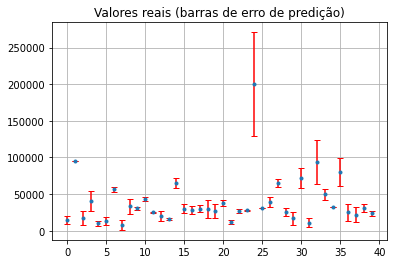

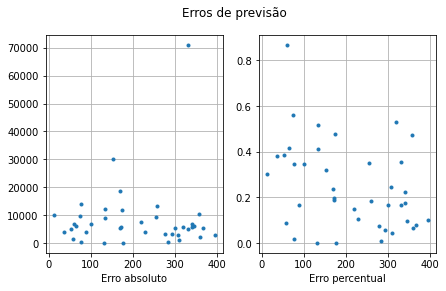

In [ ]:
lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))

print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr.intercept_))
print("Número de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

# Calcula o erro absoluto e o erro percentual da regressao linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'
      .format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erro de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()





```
# Isto está formatado como código
```

### TRANSFORMAÇÃO DE DADOS NUMÉRICOS

Vamos explorar a transformação de dados, para resolver problemas de distribuição e a normalização de dados.


--------------- Regressão Linear Normalizada ---------------
Acurácia da base de treinamento: 0.96
Acurácia da base de testes: 0.93
Descrição do modelo: 
w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57

------------------  Comparação de pesos   ------------------
Original:
 w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Normalizado:
 w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57


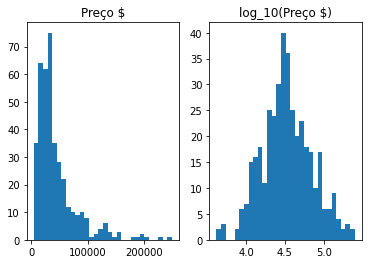

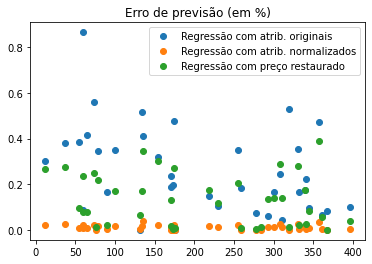

In [ ]:

# Os atributos possuem faixas de valores diferentes, que influencia os pesos 
# dos coeficientes da regressão. Vamos trabalhar melhor os atributos.

X_scale = X

# Iremos aplicar o logaritmo em "Energia total", "Área total" e "Preço $".

X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)

# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_scale)
X_scale = min_max_scaler.transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].hist(y,bins=30, label='Preço $')
ax[0].set_title('Preço $')
ax[1].hist(y_scale,bins=30, label='log10(Preço $)')
ax[1].set_title('log_10(Preço $)')


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression().fit(X_train2, y_train2)

y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2


novoerroperc = np.abs(10**y_test2 - 10**y_prev2)/ (10**y_test2)






plt.figure(figsize=(6, 4))
plt.plot(erroperc,'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc,'o', label='Regressão com atrib. normalizados')
plt.plot(novoerroperc,'o', label='Regressão com preço restaurado')
plt.title("Erro de previsão (em %)")
plt.legend()

print("\n--------------- Regressão Linear Normalizada ---------------")
print("Acurácia da base de treinamento: {:.2f}".format(lnr2.score(X_train2, y_train2)))
print("Acurácia da base de testes: {:.2f}".format(lnr2.score(X_test2, y_test2)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr2.intercept_))


print("\n------------------  Comparação de pesos   ------------------")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("Original:\n w: {}  b: {:.2f}".format(s, lnr.intercept_))
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("Normalizado:\n w: {}  b: {:.2f}".format(s, lnr2.intercept_))

